In [1]:
import sqlite3
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from pandas import DataFrame

QUERY = """
SELECT o_time AS "time", i_qty AS "qty"
FROM orders
GROUP BY o_order_id, o_time
ORDER BY o_order_id
"""

In [2]:
try:
    conn = sqlite3.connect('../db/orders_en_GB.db')
    res = conn.execute(QUERY)

    df = DataFrame(res.fetchall())
    print(df)

    df['hour'] = df[0].apply(lambda x: int(x.split(':')[0]))
    df['minute'] = df[0].apply(lambda x: int(x.split(':')[1]))
    df['value'] = df[1].apply(lambda x: float(x))
    del df[0]
    del df[1]
    print(df)
finally:
    if conn:
        conn.close()

                  0         1
0    00:00:00+02:00  5.000000
1    09:10:29+02:00  3.000000
2    10:10:45+02:00  1.000000
3    10:24:39+02:00  2.000000
4    13:25:31+02:00  4.000000
..              ...       ...
345  04:37:38+02:00  4.000000
346  05:06:00+02:00  1.000000
347  07:15:46+02:00  2.000000
348  07:30:45+02:00  1.000000
349  09:40:33+02:00  1.000000

[350 rows x 2 columns]
     hour  minute  value
0       0       0    5.0
1       9      10    3.0
2      10      10    1.0
3      10      24    2.0
4      13      25    4.0
..    ...     ...    ...
345     4      37    4.0
346     5       6    1.0
347     7      15    2.0
348     7      30    1.0
349     9      40    1.0

[350 rows x 3 columns]


In [3]:
pt = df.pivot_table(index='minute', columns='hour', values='value', aggfunc='sum').fillna(0)
print(pt)

hour      0    1    2    4    5    6    7     8    9     10  ...    14    15  \
minute                                                       ...               
0       12.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0  10.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0   0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   4.0  ...   0.0   0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   3.0  ...   0.0   0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  2.0   4.0  ...   1.0   0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  ...   3.0   0.0   
6        0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0  0.0   0.0  ...   4.0   2.0   
7        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  ...   1.0   0.0   
8        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  ...  11.0   0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  ...   0.0   0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0

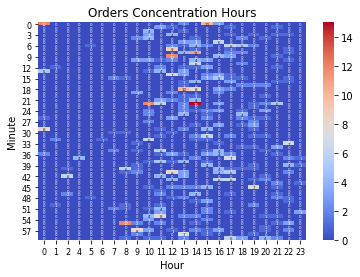

In [4]:
hm = sb.heatmap(pt, annot=True, cmap="coolwarm", annot_kws={"fontsize": 4})
hm.set_yticklabels(hm.get_yticklabels(), rotation=0, fontsize=8)
hm.set_xticklabels(hm.get_xticklabels(), rotation=0, fontsize=8)

plt.title('Orders Concentration Hours')
plt.ylabel('Minute')
plt.xlabel('Hour')
plt.grid(False)